In [1]:
import time
import random
import numpy as np
from IPython.display import SVG

from pagerank import parse_graph, page_rank

import sknetwork as skn
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.ranking import PageRank
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
def plot_graph(graph, pos=None, scores=None, cmap='plasma'):
    if scores is not None:
        nx.draw(graph, pos=pos, with_labels=True, node_color=scores, cmap=plt.get_cmap(cmap))
        sm = plt.cm.ScalarMappable(cmap=plt.get_cmap(cmap), norm=plt.Normalize(vmin = min(scores), vmax=max(scores)))
        sm._A = []
        plt.colorbar(sm, ax=plt.gca())
    else:
        nx.draw(graph, pos=pos, with_labels=True)

In [3]:
def generate_random_graph(num_nodes=None, num_edges=None, savepath='data/graph.txt'):
    edges = set()
    
    # Generate random edges
    while len(edges) < num_edges:
        a = random.randint(1, num_nodes)
        b = random.randint(1, num_nodes)
        if a != b:
            edges.add(tuple(sorted((a, b))))
            
    # Write edges to file 
    with open(savepath, 'w') as f:
        for edge in edges:
            f.write(f'{edge[0]},{edge[1]}\n')

    print(f'Created graph file with {num_nodes} nodes and {num_edges} edges')

## 1. Visualization on a simple graph

In [4]:
G = np.array(
    [
        [0,0,1,0,0,0,0],
        [0,0,1,0,1,0,0],
        [1,0,0,1,0,0,1],
        [1,0,0,0,1,0,0],
        [0,0,1,0,0,0,1],
        [1,0,1,0,0,0,1],
        [0,0,0,1,1,0,0]
    ]
)

pos = {
    0: (0.44366948562783914, 0.19772603733694338),
    1: (0.010070255584640808, 0.15401711441275534),
    2: (0.8775563408669612, 0.8670659455641998),
    3: (0.3187595264324259, 0.5474038375900341),
    4: (0.9938292218781903, 0.7189441213881198),
    5: (0.4392628790633183, 0.7283722712161769),
    6: (0.13836491703616982, 0.9020117724508725)
}

In [5]:
graph = nx.DiGraph(G)
# pos = {i: (np.random.rand(), np.random.rand()) for i in graph.nodes()} 

The given graph

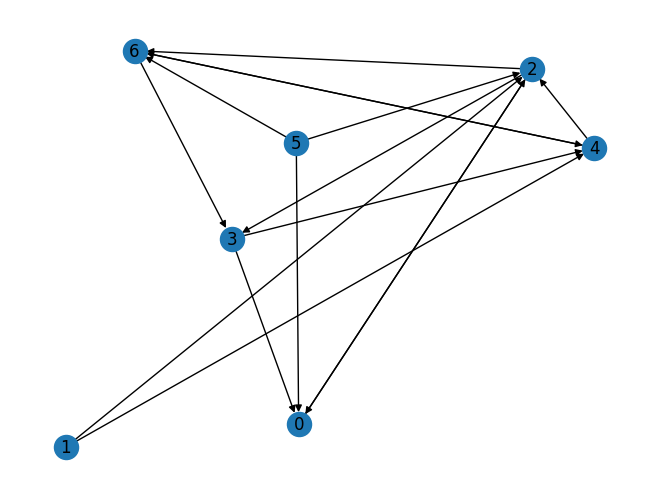

In [6]:
plot_graph(graph, pos=pos)

Final pagerank

In [7]:
scores_1 = page_rank(G)
print(scores_1)

Done in 19 iterations
[0.17325947 0.02142839 0.25945563 0.16999328 0.17783404 0.02142839
 0.17659165]


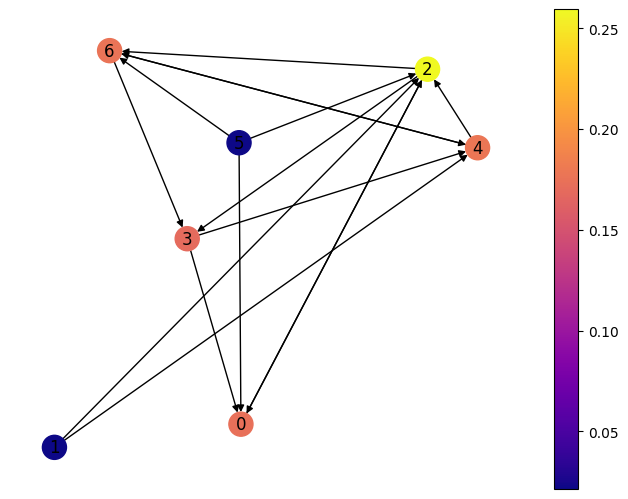

In [8]:
plot_graph(graph, pos=pos, scores=scores_1)

In [9]:
# PageRank by sknetwork
pagerank = PageRank(damping_factor=0.85)
scores_2 = pagerank.fit_predict(G)
print(scores_2)

[0.17320349 0.02142857 0.259771   0.16975706 0.17771588 0.02142857
 0.17669543]


In [10]:
# PageRank by networkX
graph = nx.from_numpy_array(G)
scores_3 = nx.pagerank(graph, alpha=0.85)
scores_3 = np.array([x for x in scores_3.values()])
print(scores_3)

[0.11855371 0.08544075 0.22175633 0.15115031 0.15339487 0.11855371
 0.15115031]


## 2. Benchmarking

In [13]:
# #Nodes unchanges, #Edges increases
generate_random_graph(num_nodes=10000, num_edges=2000, savepath='data/graph1.txt')
generate_random_graph(num_nodes=10000, num_edges=10000, savepath='data/graph2.txt')
generate_random_graph(num_nodes=10000, num_edges=50000, savepath='data/graph3.txt')
generate_random_graph(num_nodes=10000, num_edges=100000, savepath='data/graph4.txt')

# #Nodes increases, #Edges unchanges
generate_random_graph(num_nodes=500, num_edges=10000, savepath='data/graph5.txt')
generate_random_graph(num_nodes=1000, num_edges=10000, savepath='data/graph6.txt')
generate_random_graph(num_nodes=50000, num_edges=10000, savepath='data/graph7.txt')
generate_random_graph(num_nodes=100000, num_edges=10000, savepath='data/graph8.txt')

Created graph file with 10000 nodes and 2000 edges
Created graph file with 10000 nodes and 10000 edges
Created graph file with 10000 nodes and 50000 edges
Created graph file with 10000 nodes and 100000 edges
Created graph file with 500 nodes and 10000 edges
Created graph file with 1000 nodes and 10000 edges
Created graph file with 50000 nodes and 10000 edges
Created graph file with 100000 nodes and 10000 edges


Graph 1

In [14]:
G = parse_graph('data/graph1.txt')

In [15]:
%%time
# PageRank by sknetwork
pagerank = PageRank(damping_factor=0.85)
scores_1 = pagerank.fit_predict(G)

CPU times: total: 234 ms
Wall time: 247 ms


In [16]:
%%time
# PageRank by networkX
graph = nx.from_numpy_array(G)
scores_2 = nx.pagerank(graph, alpha=0.85)

CPU times: total: 234 ms
Wall time: 262 ms


In [17]:
%%time
# PageRank by our implementation
scores_3 = page_rank(G)

Done in 2 iterations
CPU times: total: 3.05 s
Wall time: 2.56 s


Graph 2

In [18]:
G = parse_graph('data/graph2.txt')

In [19]:
%%time
# PageRank by sknetwork
pagerank = PageRank(damping_factor=0.85)
scores_1 = pagerank.fit_predict(G)

CPU times: total: 203 ms
Wall time: 248 ms


In [20]:
%%time
# PageRank by networkX
graph = nx.from_numpy_array(G)
scores_2 = nx.pagerank(graph, alpha=0.85)

CPU times: total: 312 ms
Wall time: 354 ms


In [21]:
%%time
# PageRank by our implementation
scores_3 = page_rank(G)

Done in 4 iterations
CPU times: total: 3.78 s
Wall time: 2.56 s


Graph 3

In [22]:
G = parse_graph('data/graph3.txt')

In [23]:
%%time
# PageRank by sknetwork
pagerank = PageRank(damping_factor=0.85)
scores_1 = pagerank.fit_predict(G)

CPU times: total: 297 ms
Wall time: 356 ms


In [24]:
%%time
# PageRank by networkX
graph = nx.from_numpy_array(G)
scores_2 = nx.pagerank(graph, alpha=0.85)

CPU times: total: 453 ms
Wall time: 495 ms


In [25]:
%%time
# PageRank by our implementation
scores_3 = page_rank(G)

Done in 5 iterations
CPU times: total: 4.27 s
Wall time: 2.58 s


Graph 4

In [26]:
G = parse_graph('data/graph4.txt')

In [27]:
%%time
# PageRank by sknetwork
pagerank = PageRank(damping_factor=0.85)
scores_1 = pagerank.fit_predict(G)

CPU times: total: 250 ms
Wall time: 256 ms


In [28]:
%%time
# PageRank by networkX
graph = nx.from_numpy_array(G)
scores_2 = nx.pagerank(graph, alpha=0.85)

CPU times: total: 609 ms
Wall time: 678 ms


In [29]:
%%time
# PageRank by our implementation
scores_3 = page_rank(G)

Done in 6 iterations
CPU times: total: 4.22 s
Wall time: 2.82 s


Graph 5

In [30]:
G = parse_graph('data/graph5.txt')

In [31]:
%%time
# PageRank by sknetwork
pagerank = PageRank(damping_factor=0.85)
scores_1 = pagerank.fit_predict(G)

CPU times: total: 0 ns
Wall time: 3.99 ms


In [32]:
%%time
# PageRank by networkX
graph = nx.from_numpy_array(G)
scores_2 = nx.pagerank(graph, alpha=0.85)

CPU times: total: 31.2 ms
Wall time: 46.4 ms


In [33]:
%%time
# PageRank by our implementation
scores_3 = page_rank(G)

Done in 10 iterations
CPU times: total: 0 ns
Wall time: 13 ms


Graph 6

In [34]:
G = parse_graph('data/graph6.txt')

In [35]:
%%time
# PageRank by sknetwork
pagerank = PageRank(damping_factor=0.85)
scores_1 = pagerank.fit_predict(G)

CPU times: total: 0 ns
Wall time: 3.99 ms


In [36]:
%%time
# PageRank by networkX
graph = nx.from_numpy_array(G)
scores_2 = nx.pagerank(graph, alpha=0.85)

CPU times: total: 15.6 ms
Wall time: 40.9 ms


In [37]:
%%time
# PageRank by our implementation
scores_3 = page_rank(G)

Done in 10 iterations
CPU times: total: 31.2 ms
Wall time: 40.4 ms


Graph 7

In [38]:
G = parse_graph('data/graph7.txt')

In [39]:
%%time
# PageRank by sknetwork
pagerank = PageRank(damping_factor=0.85)
scores_1 = pagerank.fit_predict(G)

CPU times: total: 5.64 s
Wall time: 5.91 s


In [40]:
%%time
# PageRank by networkX
graph = nx.from_numpy_array(G)
scores_2 = nx.pagerank(graph, alpha=0.85)

CPU times: total: 5.48 s
Wall time: 5.85 s


In [41]:
%%time
# PageRank by our implementation
# scores_3 = page_rank(G)

CPU times: total: 0 ns
Wall time: 0 ns


Graph 8

In [42]:
G = parse_graph('data/graph8.txt')

In [43]:
%%time
# PageRank by sknetwork
pagerank = PageRank(damping_factor=0.85)
scores_1 = pagerank.fit_predict(G)

CPU times: total: 22.3 s
Wall time: 23.4 s


In [44]:
%%time
# PageRank by networkX
graph = nx.from_numpy_array(G)
scores_2 = nx.pagerank(graph, alpha=0.85)

CPU times: total: 21.1 s
Wall time: 22.6 s


In [45]:
%%time
# PageRank by our implementation
# scores_3 = page_rank(G)

CPU times: total: 0 ns
Wall time: 0 ns
